In [2]:
# Basic Libraries
import pandas as pd
import numpy as np

# Libraries for visualizaton
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Catplot

#### En büyük özelliği col ve row sayesinde bir grafikte, diğer değişkenleride ekleyerek kıyaslama yapabiliyoruz.

In [4]:
titanic = sns.load_dataset("titanic")

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


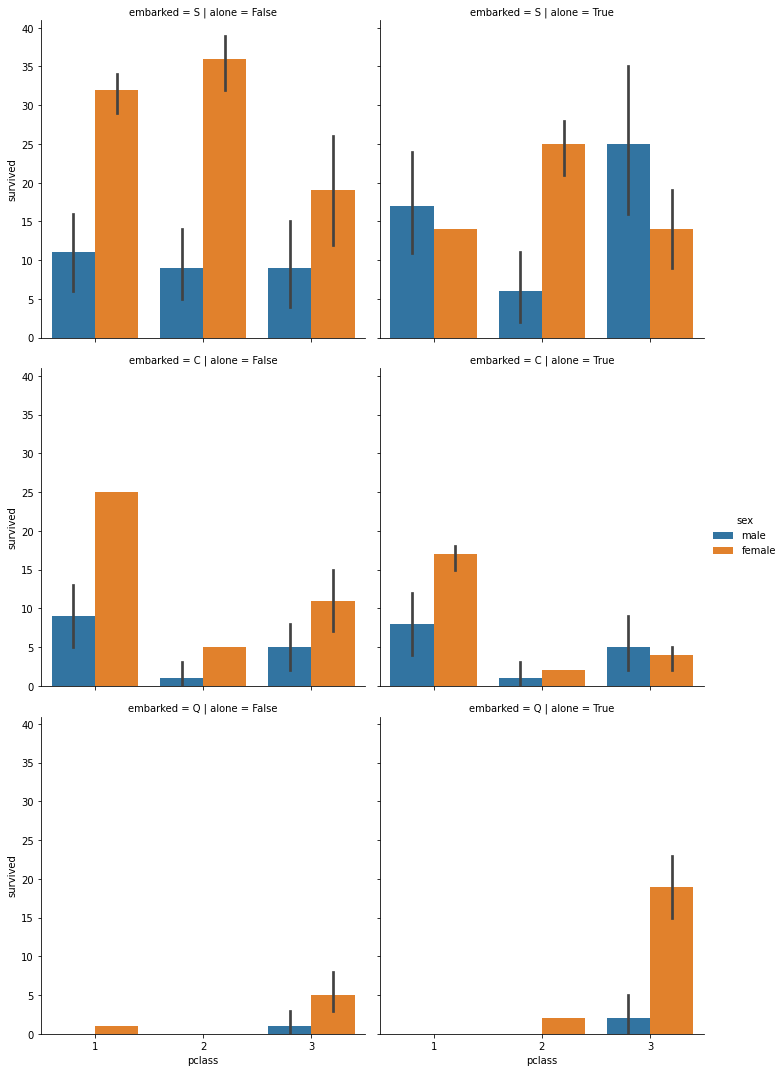

In [6]:
sns.catplot(x="pclass", y="survived", data=titanic, kind="bar", estimator=np.count_nonzero, hue="sex", col="alone", row="embarked")  # default olarak mean getirir.

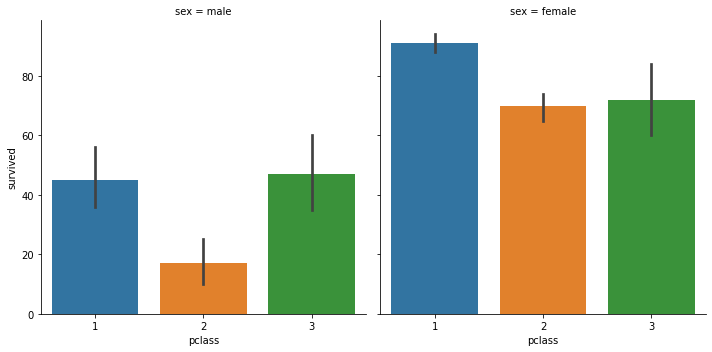

In [8]:
sns.catplot(x="pclass", y="survived", data=titanic, kind="bar", estimator=np.count_nonzero, col="sex")  # default olarak mean getirir.

In [11]:
tips = sns.load_dataset("tips")

In [15]:
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [14]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


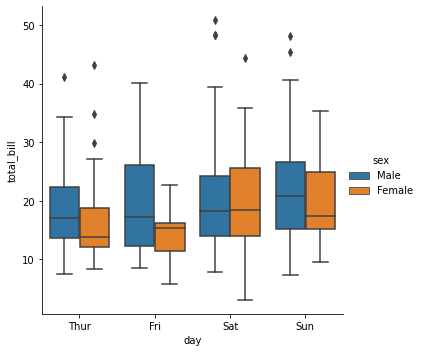

In [18]:
sns.catplot(x="day", y="total_bill", data=tips, kind="box", hue="sex")

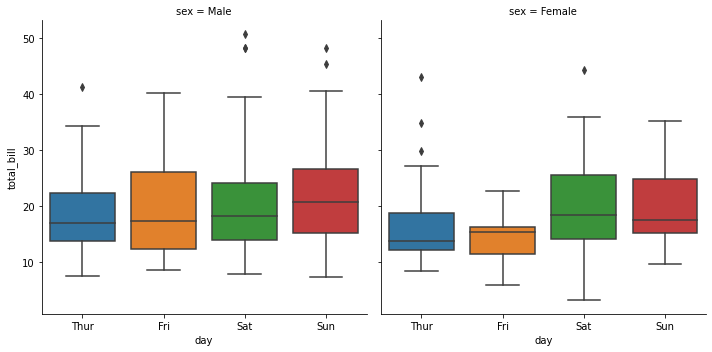

In [19]:
sns.catplot(x="day", y="total_bill", data=tips, kind="box", col="sex")

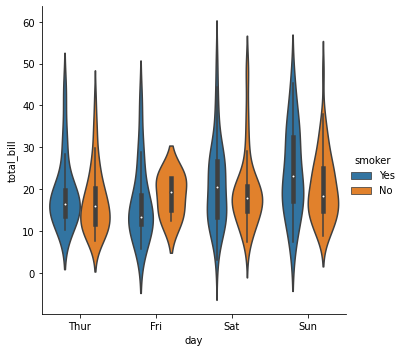

In [21]:
sns.catplot(x="day", y="total_bill", data=tips, kind="violin", hue="smoker")

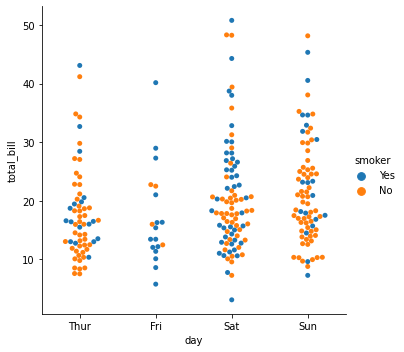

In [22]:
sns.catplot(x="day", y="total_bill", data=tips, kind="swarm", hue="smoker")

## Jointplot

In [24]:
tips = sns.load_dataset("tips")

In [25]:
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


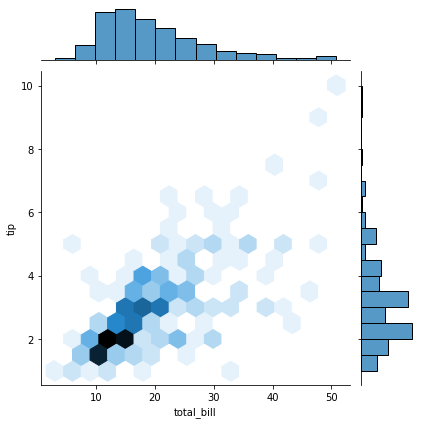

In [30]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")
# kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }
# Kind of plot to draw. See the examples for references to the underlying functions.

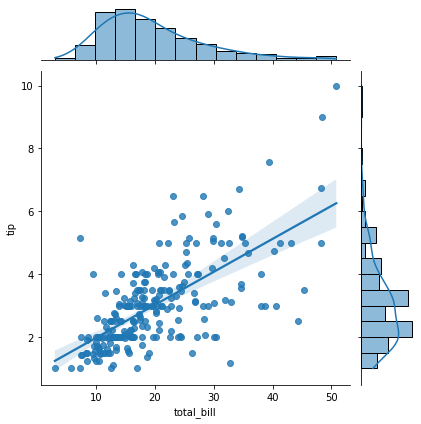

In [32]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

## Pairplot

#### Veriye hızlı bir göz atma anlamında fayda sağlar.

In [34]:
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


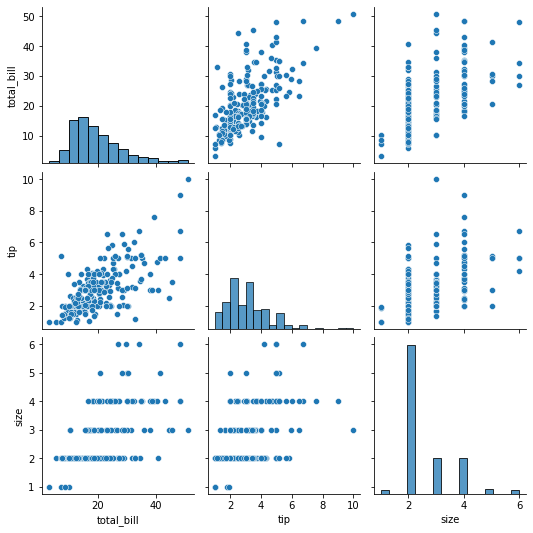

In [33]:
sns.pairplot(tips)

# içine eksen koymuyoruz. çalışmak istediğimiz veri setini yazıyoruz.
# dataseti içindeki numerik değerleri kendi içinde ilişkilendirecek.

In [ ]:
# size masada oturan kişi sayısı olduğundan dolayı kendi içinde numerik olsada bir kategorik değişken.

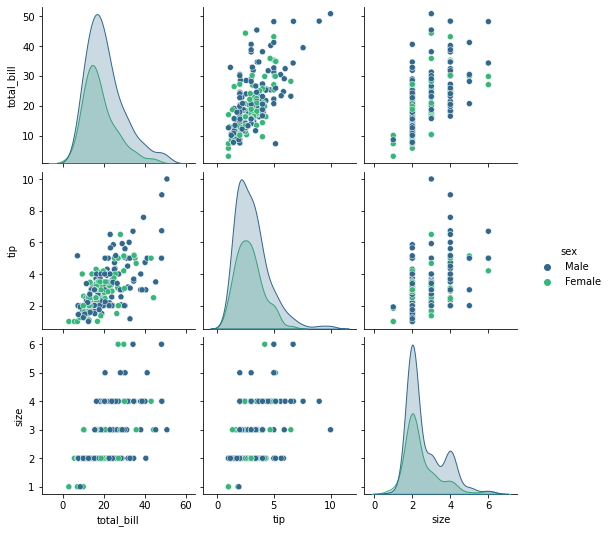

In [36]:
sns.pairplot(tips, hue="sex", palette="viridis")

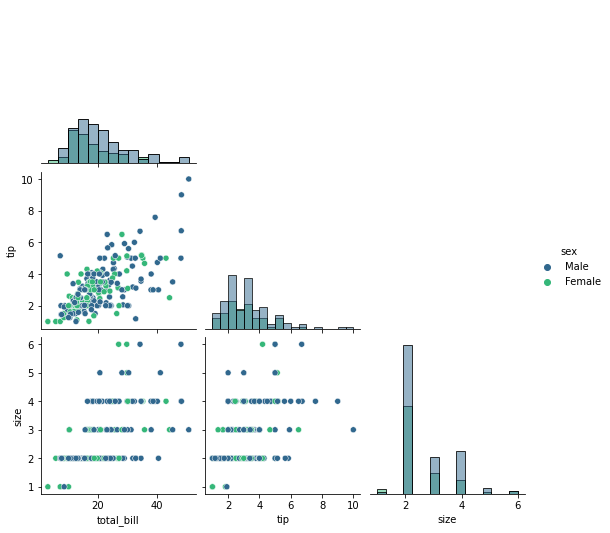

In [38]:
sns.pairplot(tips, hue="sex", palette="viridis", corner=True , diag_kind="hist")

# PairGrid

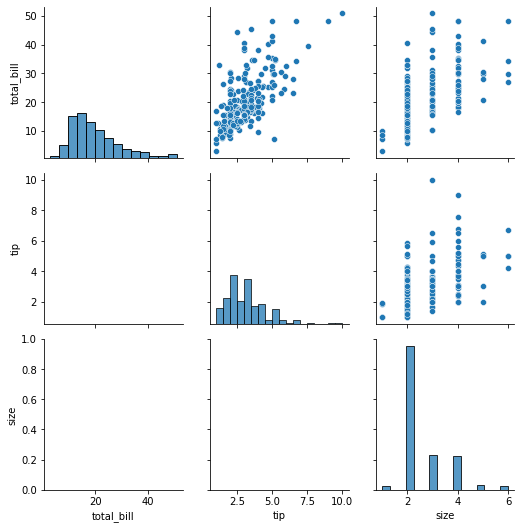

In [41]:
g = sns.PairGrid(tips)

g = g.map_upper(sns.scatterplot)
g = g.map_diag(sns.histplot)

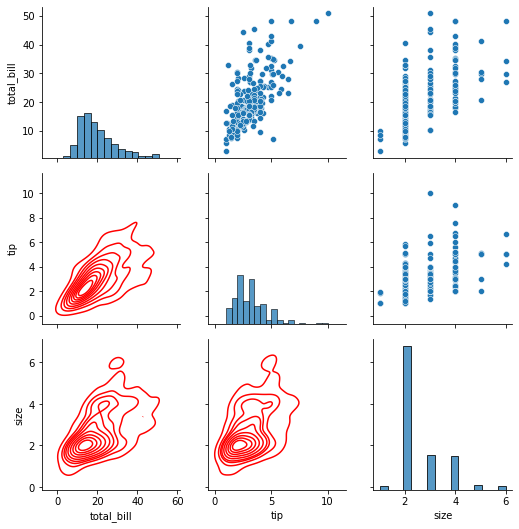

In [43]:
g = sns.PairGrid(tips)

g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot, color="r")
g = g.map_diag(sns.histplot)

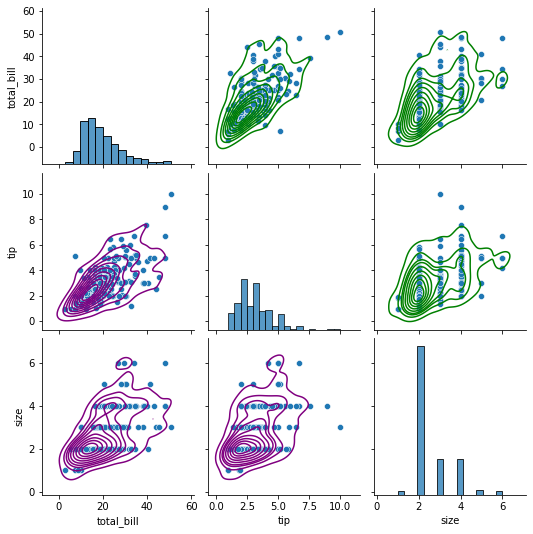

In [44]:
a = sns.pairplot(tips)

a.map_lower(sns.kdeplot, color='purple')
a.map_upper(sns.kdeplot, color='g');

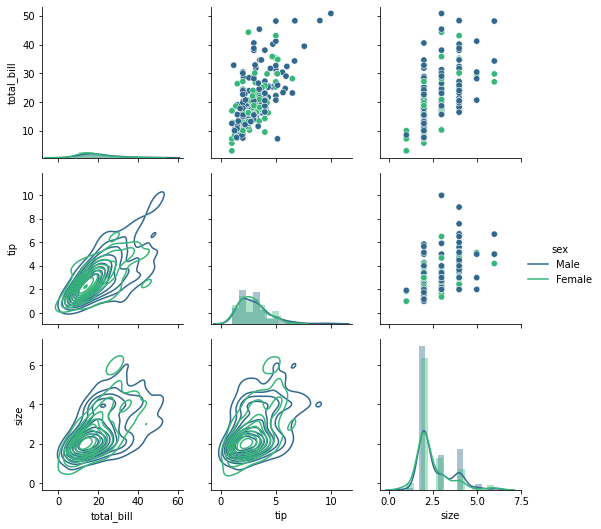

In [45]:
g = sns.PairGrid(tips, hue="sex", palette="viridis")

g = g.map_upper(sns.scatterplot, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.distplot)
g = g.map_lower(sns.kdeplot)

g = g.add_legend();

# FacetGrid

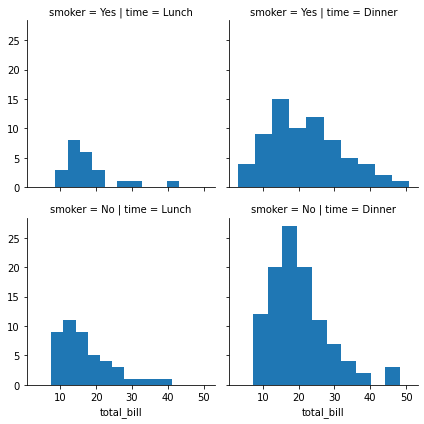

In [48]:
g = sns.FacetGrid(data = tips, col="time", row="smoker")
#time ve smoker e göre grupladı ve total_bill göre hist çizdirdi.

g = g.map(plt.hist, "total_bill")

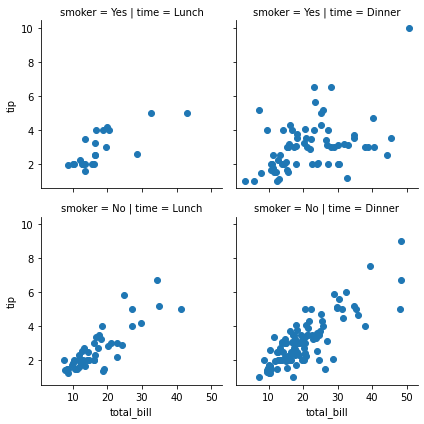

In [49]:
g = sns.FacetGrid(data = tips, col="time", row="smoker")
#time ve smoker e göre grupladı ve total_bill göre hist çizdirdi.

g = g.map(plt.scatter, "total_bill", "tip") # scatter da iki değişken olmalı.

# Heatmap

In [50]:
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


<AxesSubplot:>

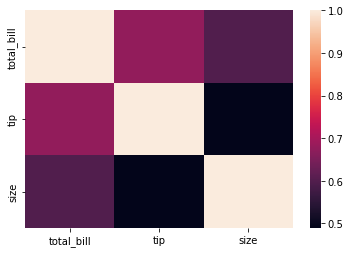

In [52]:
sns.heatmap(data=tips.corr())

<AxesSubplot:>

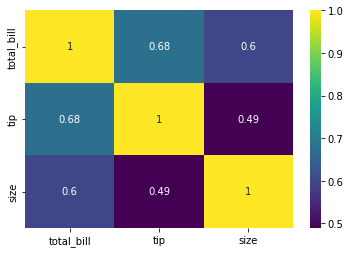

In [53]:
sns.heatmap(data=tips.corr(), cmap="viridis", annot=True)

<AxesSubplot:>

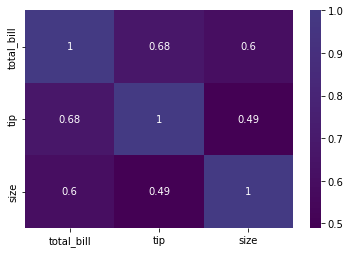

In [55]:
sns.heatmap(data=tips.corr(), cmap="viridis", annot=True, center=2)

# center, Rengin bir degerden diger degere gecis yaptigi renge 1 atar

# Clustermap

In [56]:
iris = sns.load_dataset("iris")

In [58]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


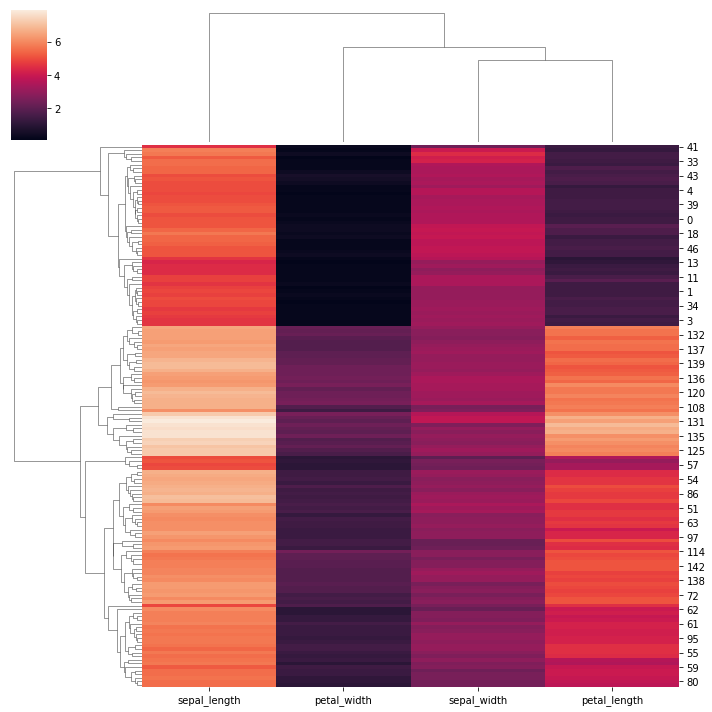

In [59]:
species=iris.pop("species")
sns.clustermap(iris)

# Machine Learning kısmında bolca kullanılacak.

In [60]:
penguins = sns.load_dataset("penguins")

In [61]:
penguins.head(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male


In [63]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [62]:
penguins.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


<AxesSubplot:>

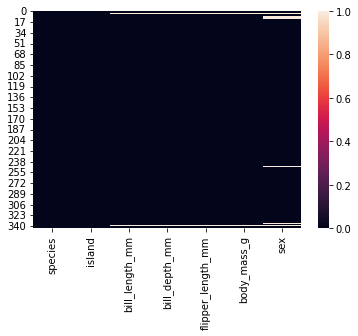

In [64]:
sns.heatmap(penguins.isnull())  # heatmap ile Null değerlere bakıyoruz.

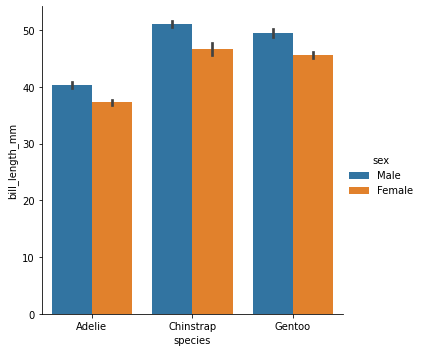

In [66]:
sns.catplot(x="species", y="bill_length_mm", data=penguins, hue="sex", kind= "bar")

# catplot ile hue yapabiliriz. 
# Türünü de belirtiyoruz. Default olarak kind strip geliyor. Default olarak mean değerlerini veriyor.
# Legend ve label lar default olarak geliyor.
# en güzel özelliği col ve row lar ile birçok değişkeni tek bir figure de gösteriyoruz.
# bar da default olarak mean değerini veriyordu ancak box ile birçok şeyi görebiliyoruz.

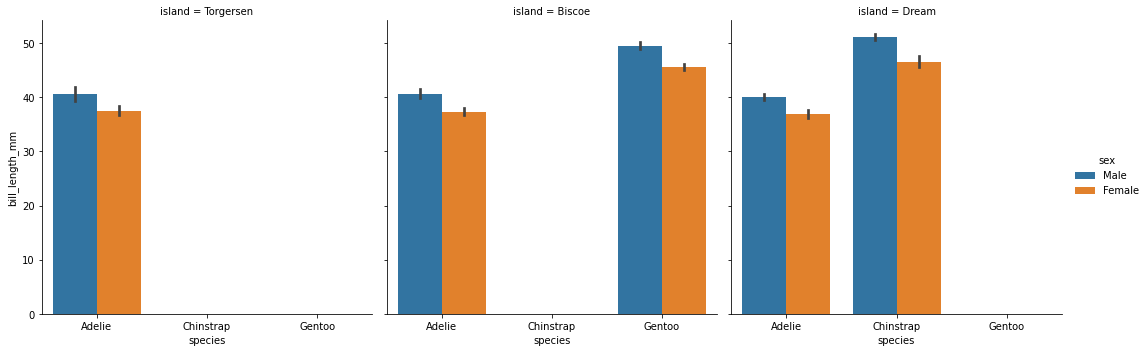

In [67]:
sns.catplot(x="species", y="bill_length_mm", data=penguins, hue="sex", col="island",kind= "bar")

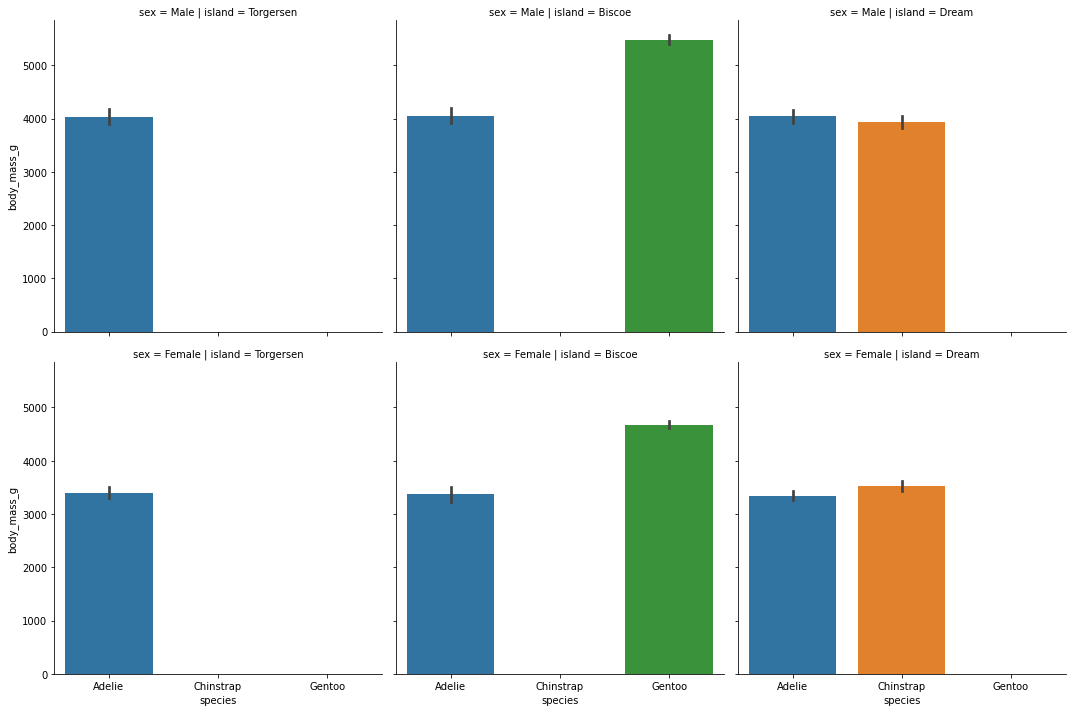

In [69]:
sns.catplot(x="species", y="body_mass_g", data=penguins, row="sex", col="island",kind= "bar")

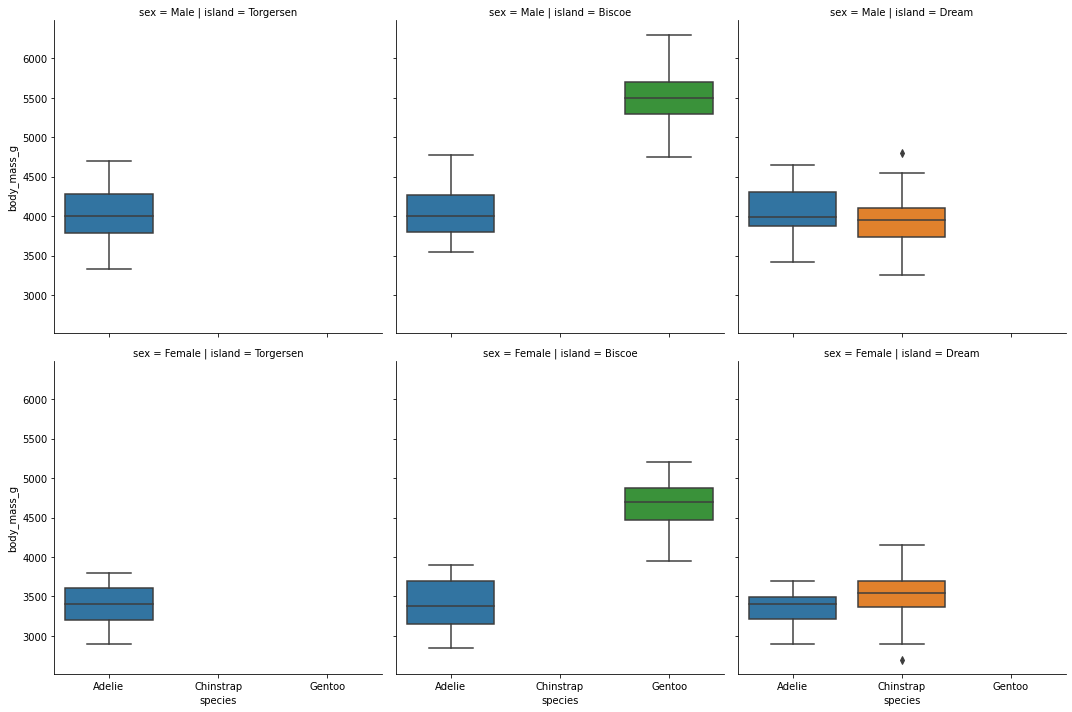

In [70]:
sns.catplot(x="species", y="body_mass_g", data=penguins, row="sex", col="island",kind= "box")

### jointplot

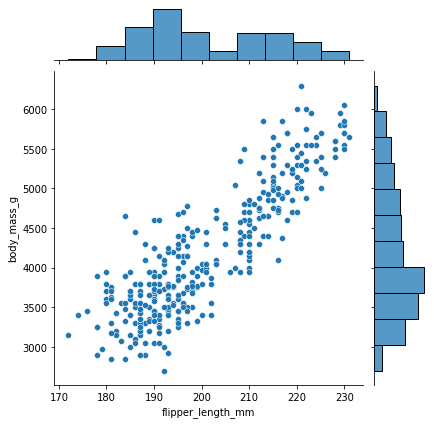

In [71]:
sns.jointplot(x="flipper_length_mm", y="body_mass_g", data=penguins) 

# kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }

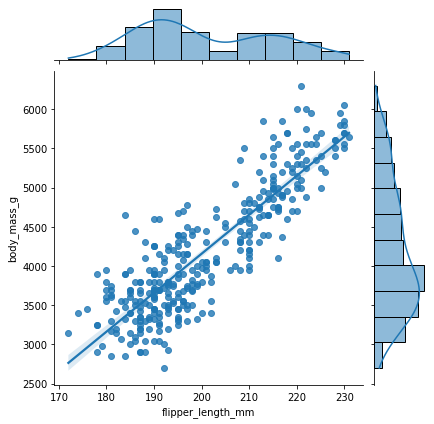

In [72]:
sns.jointplot(x="flipper_length_mm", y="body_mass_g", data=penguins, kind="reg") 
# reg ile oluşan confidence interval görebiliyoruz.

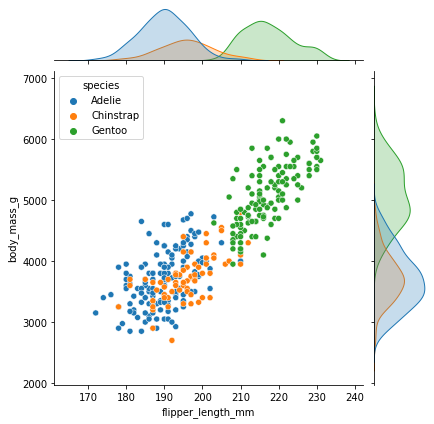

In [73]:
sns.jointplot(x="flipper_length_mm", y="body_mass_g", data=penguins, hue="species") 

# PairGrid

In [3]:
sns.pairplot(penguins, hue="species") 

NameError: name 'penguins' is not defined